In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


(4.0, 8.0)

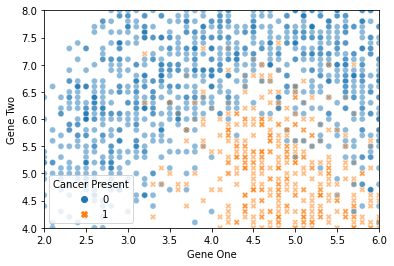

In [10]:
sns.scatterplot(data=df, x='Gene One',y='Gene Two', hue ='Cancer Present', alpha = 0.5, style='Cancer Present')
plt.xlim(2,6)
plt.ylim(4,8)

In [6]:
len(df)

3000

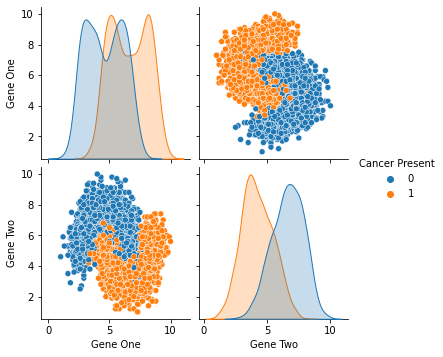

In [11]:
sns.pairplot(data=df, hue='Cancer Present')

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
X = df.drop('Cancer Present', axis=1)

In [26]:
y = df['Cancer Present']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
scaler = StandardScaler()

In [30]:
scaled_X_train = scaler.fit_transform(X_train)

In [31]:
scaled_X_test = scaler.transform(X_test)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [34]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [38]:
y_pred = knn_model.predict(scaled_X_test)

In [39]:
from sklearn.metrics import confusion_matrix,classification_report

In [40]:
confusion_matrix(y_test,y_pred)

array([[424,  46],
       [ 49, 381]])

In [41]:
len(y_test)

900

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       470
           1       0.89      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



In [45]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

In [48]:
from sklearn.metrics import accuracy_score
1-accuracy_score(y_test, y_pred)

0.10555555555555551

In [49]:
test_error_rates = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1-accuracy_score(y_test, y_pred_test)
    
    test_error_rates.append(test_error)

In [50]:
test_error_rates

[0.10555555555555551,
 0.09999999999999998,
 0.07444444444444442,
 0.07777777777777772,
 0.07222222222222219,
 0.06666666666666665,
 0.06333333333333335,
 0.05888888888888888,
 0.05777777777777782,
 0.06222222222222218,
 0.06000000000000005,
 0.061111111111111116,
 0.061111111111111116,
 0.061111111111111116,
 0.06000000000000005,
 0.05777777777777782,
 0.05555555555555558,
 0.05555555555555558,
 0.053333333333333344,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05555555555555558,
 0.05555555555555558,
 0.05777777777777782,
 0.05777777777777782]

Text(0.5, 0, 'K Neighbors')

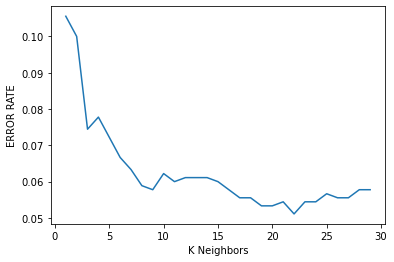

In [52]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel('ERROR RATE')
plt.xlabel('K Neighbors')

In [53]:
# PIPELINE --> GRIDSEARCH CV

In [54]:
scaler = StandardScaler()

In [55]:
knn = KNeighborsClassifier()

In [56]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [57]:
operations = [('scaler',scaler),('knn',knn)]

In [60]:
from sklearn.pipeline import Pipeline

In [61]:
pipe = Pipeline(operations)

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
k_values = list(range(1,20))

In [64]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [66]:
param_grid = {'knn__n_neighbors':k_values}

In [67]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [68]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [69]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=14))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=14),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 14,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [71]:
full_pred = full_cv_classifier.predict(X_test)

In [73]:
print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [74]:
new_parient = [[3.8,6.4]]

In [75]:
full_cv_classifier.predict(new_parient)

/Users/miglenaruskova/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [76]:
full_cv_classifier.predict_proba(new_parient)

/Users/miglenaruskova/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[1., 0.]])